In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Membership Function
servis = {
    'sangat baik' : [60.00, 85.00, 100.00, 100.00 ], 
    'biasa'   : [ 15.00, 35.00, 60.00, 75.00 ], 
    'buruk'   : [ 0.00, 0.00, 15.00, 30.00 ]
}

harga = {
    'mahal'   : [ 7.00, 9.00, 10.00, 10.00],
    'biasa'   : [ 1.00, 3.00, 7.00, 9.00],
    'murah'   : [ 0.00, 0.00, 1.00, 3.00]
}

keanggotaan = {'tinggi': 90, 'biasa': 50, 'rendah': 30}

In [ ]:
#graph

def convert_graph(batas, warna, label='', min=0, max=1):
    y = [0, 1, 1, 0]
    plt.plot( (min, batas[0]), (0,0), warna )
    for i in range(len(batas)-1):
        plt.plot((batas[i], batas[i+1]), (y[i], y[i+1]), warna)
    plt.plot((batas[-1], max), (0,0), warna, label=label)

In [ ]:
def plotting( membership, min=0, max=1):
    warna = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 
    i=0
    for l in membership :
        convert_graph(membership[l], warna[i], l, min=min, max=max)
        i += 1
    plt.legend(loc=3)
    plt.show()

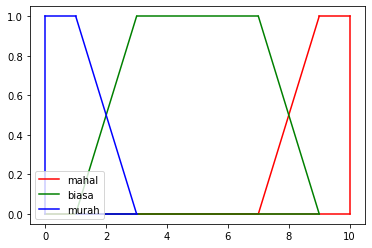

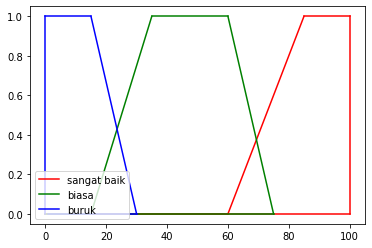

In [ ]:
plotting(harga)
plotting(servis)

In [ ]:
def linguistik(x, batas):

  if x < batas[0] or x > batas [3]:
      return 0

  elif batas[2] >= x >= batas[1]:
      return 1

  elif batas[1] > x >= batas[0]:
      return (x-batas[0]) / (batas[1]-batas[0])

  elif batas[3] > x >= batas[2]: 
      return -1*(x-batas[3]) / (batas[3]-batas[2])
  
  return 0

FUZZIFICATION

In [ ]:
def count_hasil(x, aturan):
  result = {}

  for state in aturan:
    result[state] = linguistik(x, aturan[state])
  return result

In [ ]:
def fuzzyfikasi(x, aturan):
  result = []

  for jenis in range(len(aturan)):
    result.append(count_hasil(x[jenis], aturan[jenis]))

  return result

INFERENSI

In [ ]:
#aturan untuk NK
rule = {
    ('sangat baik', 'mahal') : 'biasa',
    ('sangat baik', 'biasa') : 'tinggi',
    ('sangat baik', 'murah') : 'tinggi',
    ('biasa', 'mahal') : 'rendah',
    ('biasa', 'biasa') : 'biasa',
    ('biasa', 'murah') : 'tinggi',
    ('buruk', 'mahal') : 'rendah',
    ('buruk', 'biasa') : 'rendah',
    ('buruk', 'murah') : 'biasa'
}

In [ ]:
def inferensi (fuzzed, rule) :
  hasil = {}

  for type1, value1 in fuzzed[0].items():
    for type2, value2, in fuzzed[1].items():
      r = (type1,type2)
      min_value = min(value1, value2)
      current_value = hasil.get(rule[r], 0)
      hasil[rule[r]]= max( min_value, current_value )

    
  return hasil

DEFUZZ

In [ ]:
def defuzz(infer, kualitas):
    #sugeno
    num = 0
    denum = 0


    for tipe in kualitas:
        num = num+infer[tipe] * kualitas[tipe]
        denum = denum + infer[tipe]
    return num/denum

MAIN

In [ ]:
test = pd.read_csv('bengkel.csv')
test_id = test[['id']]
test = test[['servis', 'harga' ]]
data_test = test.values

In [ ]:
skor_test = []
for x in data_test : 
    fuzzy = fuzzyfikasi(x, [servis, harga])
    infer = inferensi(fuzzy, rule)
    defuz = defuzz(infer,keanggotaan)
    skor_test.append(defuz)
  



In [ ]:
data = pd.read_csv("bengkel.csv")

data.insert(3, "Defuz", skor_test)

In [ ]:
data = data.sort_values(by="Defuz", ascending = False)[:10]


In [ ]:
final = pd.DataFrame(test_id, columns=['id'])

In [ ]:
final.insert(1, "Defuzz/Hasil", skor_test)

In [ ]:
final = final.sort_values(by="Defuzz/Hasil", ascending=False)[:10]

In [ ]:
final.to_excel("peringkat.xlsx", index=False)